In [2]:
import numpy as np
import random as rd

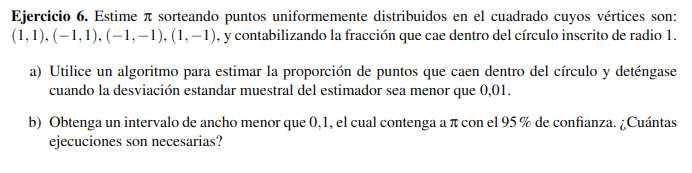

In [3]:
def en_cirulo():
    """ 
    Genera dos valores en el cuadrado:
    (1,1)(-1,1), (-1,-1)(1,-1)
    y determina si estan en el circulo de radio 1. 
    (Es una Bernoulli)
    """
    u = rd.uniform(-1,1)
    v = rd.uniform(-1,1)
    return 1 if u**2 + v**2 < 1 else 0

Como estamos trabajando con una bernoulli, la varianza de la bernoulii es p(1-p), por lo que para ir calculando la varianza del estimador de la media muestral, debo dividir dicho resultado por n. 

In [41]:
def estimador_prop(d=0.01):
    p = 0
    n = 0
    while n <= 100 or np.sqrt((p*(1-p))/n) > d:
        n += 1
        x = en_cirulo()
        p = p + (x-p)/n

    var = p*(1-p)
    return n,round(p, 4), round(var, 4) 

In [72]:
estimador_prop()

(1716, 0.7803, 0.1714)

In [236]:
def intervalo_proporcion(z_alfa_2=1.96, L=0.001):
    'Confianza = 1 - alfa, ampliud del intervalo = L'
    d = L/(2*z_alfa_2)
    p = 0
    n = 0
    while n <= 100 or np.sqrt(p * (1-p)/n) > d:
        n += 1
        X = en_cirulo()
        p = p + (X - p)/n
    Ic_inf = p - z_alfa_2*np.sqrt((p*(1-p))/n)
    Ic_sup = p + z_alfa_2*np.sqrt((p*(1-p))/n)
    ancho = Ic_sup - Ic_inf
    return n, round(4*p,4), (round(Ic_inf,4), round(Ic_sup,4)), round(ancho,4)

In [238]:
intervalo_proporcion()

(2587018, 3.1429, (0.7852, 0.7862), 0.001)